In [25]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [26]:
#importing csv file
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Unnamed: 0,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,High_BP,Low_BP
0,0,1,27,8,6.1,6,42,6,1,77,4200,0,126,83
1,1,1,28,1,6.2,6,60,8,2,75,10000,0,125,80
2,2,1,28,1,6.2,6,60,8,2,75,10000,0,125,80
3,3,1,28,8,5.9,4,30,8,3,85,3000,1,140,90
4,4,1,28,8,5.9,4,30,8,3,85,3000,1,140,90


In [27]:
df.shape

(374, 14)

In [28]:
# Drop unnecessary columns
df = df.drop(["Unnamed: 0"],axis=1)

In [29]:
# # Dividing dependent and independent variables

X = df.drop("Sleep Disorder", axis=1)
y = df["Sleep Disorder"]

In [30]:
# Sampling
from imblearn.over_sampling import SMOTE 
from collections import Counter

sampler = SMOTE()
X, y = sampler.fit_resample(X, y)

print("SMOTE {}".format(Counter(y)))

SMOTE Counter({0: 219, 1: 219, 2: 219})


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Machine Learning

Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)
random_forest_model=clf.fit(X_train, y_train)
y_pred=random_forest_model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        52
           1       0.92      0.89      0.91        38
           2       0.90      0.86      0.88        42

    accuracy                           0.91       132
   macro avg       0.91      0.90      0.91       132
weighted avg       0.91      0.91      0.91       132



In [35]:
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[50,  0,  2],
       [ 2, 34,  2],
       [ 3,  3, 36]], dtype=int64)

<AxesSubplot: >

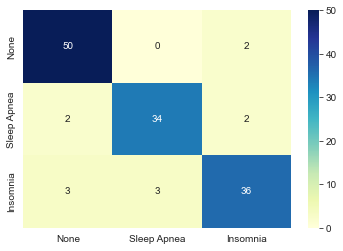

In [36]:
x_axis_labels = ["None","Sleep Apnea","Insomnia"]
y_axis_labels =  ["None","Sleep Apnea","Insomnia"]

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap="YlGnBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)

Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt_model.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        52
           1       0.89      0.89      0.89        38
           2       0.90      0.86      0.88        42

    accuracy                           0.91       132
   macro avg       0.91      0.90      0.91       132
weighted avg       0.91      0.91      0.91       132



In [39]:
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[50,  0,  2],
       [ 2, 34,  2],
       [ 2,  4, 36]], dtype=int64)

<AxesSubplot: >

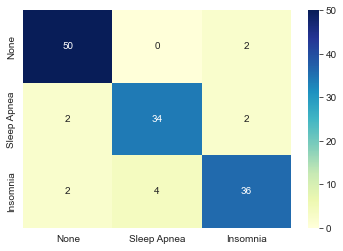

In [40]:
x_axis_labels = ["None","Sleep Apnea","Insomnia"]
y_axis_labels =  ["None","Sleep Apnea","Insomnia"]

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap="YlGnBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)

Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

clf= LogisticRegression()
logistic_model=clf.fit(X_train,y_train)
y_pred=logistic_model.predict(X_test)

c:\Users\HP-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        52
           1       0.74      0.82      0.78        38
           2       0.81      0.93      0.87        42

    accuracy                           0.82       132
   macro avg       0.82      0.83      0.82       132
weighted avg       0.83      0.82      0.82       132



In [43]:
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[38, 10,  4],
       [ 2, 31,  5],
       [ 2,  1, 39]], dtype=int64)

<AxesSubplot: >

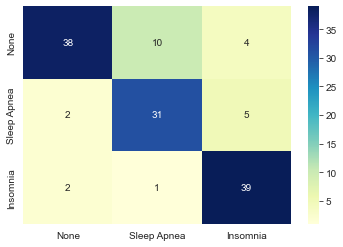

In [44]:
x_axis_labels = ["None","Sleep Apnea","Insomnia"]
y_axis_labels =  ["None","Sleep Apnea","Insomnia"]

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap="YlGnBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)

K-Nearest Neighbors(KNN)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

clf= KNeighborsClassifier(n_neighbors=25)

# Train the model using the training sets
knn_model=clf.fit(X_train,y_train)

y_pred=knn_model.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        52
           1       0.84      0.82      0.83        38
           2       0.84      0.76      0.80        42

    accuracy                           0.83       132
   macro avg       0.83      0.82      0.82       132
weighted avg       0.83      0.83      0.83       132



In [47]:
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[46,  1,  5],
       [ 6, 31,  1],
       [ 5,  5, 32]], dtype=int64)

<AxesSubplot: >

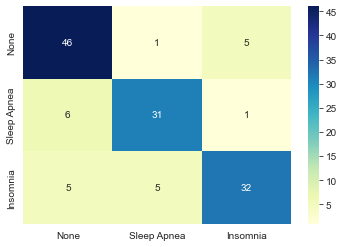

In [48]:
x_axis_labels = ["None","Sleep Apnea","Insomnia"]
y_axis_labels =  ["None","Sleep Apnea","Insomnia"]

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap="YlGnBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)